## <center>CITS5508 Lab sheet 4: Ensemble Classifiers and Random Forest Regressors</center>

**Name: Samuel Heath**<br>
**Student number: 21725083**<br>

## Project 1 - Ensemble on Parkinsons Data
### Summary:
- Load and clean data.
- Remove Classes that dont have enough instances.
- Remove unneeded features and scale the dataset.
- Train Voting Classifier Ensemble with Logistic Regression and SVM classifiers.

##### Load Data from `./parkinsons.data`

In [97]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from six.moves import urllib

# Set the random seed to ensusre consistent results
random_seed = 12

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
# Download CSV, status 1 = Parkinsons,  0 = unhealthy
with urllib.request.urlopen(data_url) as response:
    data = response.read().decode('utf8')
    out = open('./parkinsons.data', 'w')
    out.write(data)
    out.close()

park_data = pd.read_csv('./parkinsons.data')

# Drop Name as we don't need the field.
park_data = park_data.drop('name', axis=1)

print(park_data.head())
park_data.describe()

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


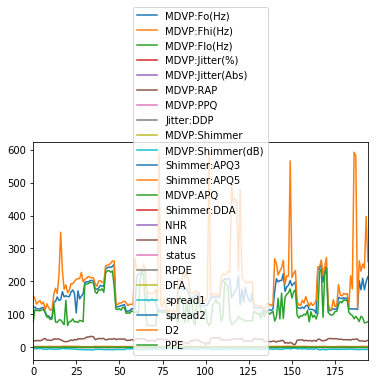

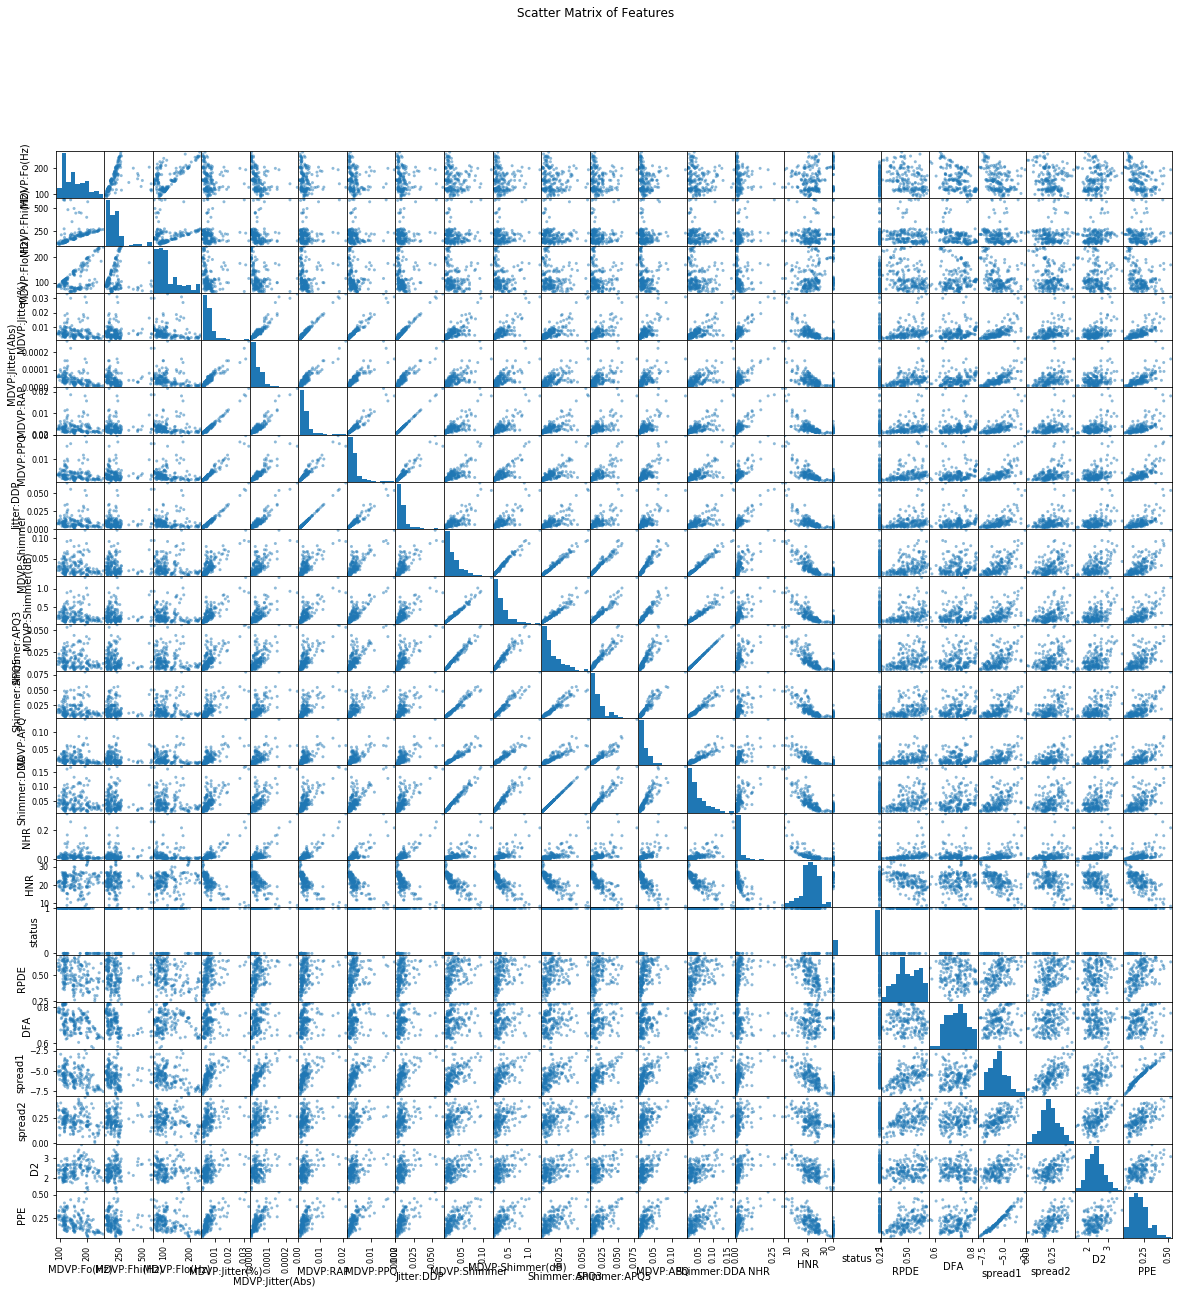

In [98]:
park_data.plot()
plt.show()

from pandas.plotting import scatter_matrix
scatter_matrix(park_data, figsize=(20,20))
plt.suptitle("Scatter Matrix of Features")
plt.show()

From the Plot we see there are a few features which are highly weighted due to the difference in the feature's scales.
From the Scatter Plot a few features are linearly related such as `Shimmer:APQ3` and `Shimmer:DDA`

In [99]:
park_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


From the above correlation matrix we see there are features with the lowest correlation to the status of the patient, these being `MDVP:Fhi(HZ)`, `DFA`, and `NHR` features. These were removed and found to have no impact on the performance of the classification confirming that they are not important. However, other features with low correlation did affect the classification accuracy when removed, hence were kept in the feature space, although one could argue for the removal of features such as `MDVP:Jitter(%)`, and `MDVP:Shimmer(dB)`, as these features may be accounted for by other features.

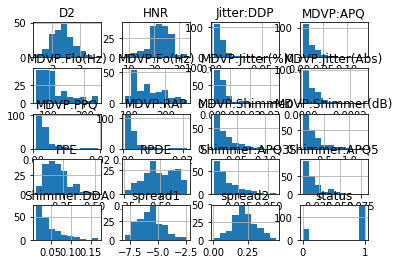

In [100]:
park_data = park_data.drop(["NHR","MDVP:Fhi(Hz)","DFA"], axis=1)
park_data.hist()
plt.show()

We see from the the above histogram of patient status the data set is slightly imbalanced with about 3 times as many positive instances to negative training instances.

## Split the dataset into training and testing datasets

Experimentally I found that the stratified shuffle split improved performance of prediction, likely due to a more even distribution of the positive and negative instances in the training and test sets.

In [101]:
from sklearn.model_selection import StratifiedShuffleSplit

# Shuffle then split the dataset into 80/20 (training/testing) sets. 
# Using Stratified so that the distribution of positive and negative status are evenly split between the test and training sets.
# Using a plain ShuffleSplit f1 scores dropped by about %6
sss = StratifiedShuffleSplit(random_state=random_seed, test_size=0.2, train_size=0.8)

# Have not separated the status before performing the split as it is easier.

# Perform the split and assign the X_train and X_test sets, then
for train_index, test_index in sss.split(park_data, park_data.status):
    X_train, X_test = park_data.iloc[train_index], park_data.iloc[test_index]    
    
# Get the patient status of the dataset, can leave it in 0 and 1 form but convert it to True/False
y_train, y_test = X_train.status == 1, X_test.status == 1

# Drop patient status from X
X_train = X_train.drop("status", axis=1)
X_test = X_test.drop("status", axis=1)

Scale the training and testing data sets so that SVM can better fit the data using a MinMaxScaler on the data.

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit the data to a Model
Make 3 models. Ensemble Voting Classifier, Logisitc Regression, and Suppot Vector Machine Classifier

In [103]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create Logistic Regression Classifier
lr = LogisticRegression(C=0.15, solver='lbfgs', random_state=random_seed)

# Create Support Vector Classifier
svm = SVC(gamma="auto", C=0.13, kernel='linear', probability=True, random_state=random_seed)

# List of Tuples of estimator's for the Voting Classifier
est = [("SVM", svm),
       ("Logistic", lr),]

ensemble_clf = VotingClassifier(voting='soft', estimators=est).fit(X_train_scaled, y_train)

pipeline = Pipeline([
    ('scaler', scaler),
    ('voting', ensemble_clf)
])

# Apply Transformations then fit the data to the voting classifier
pipeline.fit(X_train, y_train)
# Apply Transformations to the test data and predict using the model.
ensemble_test_predict = pipeline.predict(X_test)

# Sub-Classifier predictions (could get the models from the voting classifier object but easier to just reference directly)
lr_test_predict = lr.fit(X_train_scaled, y_train).predict(X_test_scaled)
svm_test_predict = svm.fit(X_train_scaled, y_train).predict(X_test_scaled)

For the Logistic Regression Classifier more highly regularised `C=0.15` increased f1_score by `2%`, and `liblinear` and `lbfgs` achieved similar results.

For the SVM Classifier `C=0.13` and `gamma='auto'` was found to perform well from trial and error testing as more highly regularised values reduced f1 score of this estimator, and `kernel='linear'` and `kernal='rbf'` both gave similar results. `probability=True` as the voting classifier may want to be using soft voting.

For the Voting classifier, `voting='soft'` is used as hard voting is not particularly effective with only two estimators, this allows us to weigh up the percentage probability of it being True or False between the two estimators.

### Accuracy of Ensemble and Baseline Classifiers
Compare the accuracy of the fitted models using their f1 score and confusion matrices.

In [104]:
from sklearn.metrics import f1_score, confusion_matrix

ensemble_f1 = f1_score(y_test, ensemble_test_predict)
lr_f1 = f1_score(y_test, lr_test_predict)
svm_f1 = f1_score(y_test, svm_test_predict)

print("Ensemble: %.6f%%\tLogistic: %.6f%%\tSVM: %.6f%%" % (ensemble_f1, lr_f1, svm_f1))

Ensemble: 0.920635%	Logistic: 0.878788%	SVM: 0.865672%


Based on the f1 scores we see that all the classifiers are quite accurate and that they all achieve the same result.

Lets see the confusion matricies to observer where the classifiers are failing to properly identify PD and Healthy Patients.

In [105]:
def plot_confusion_matrix(matrix, title=""):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.title(title)
    
    locs, labels = plt.xticks()
    # Because labels are not applied at the 0 location we need an extra label to ensure its displayed
    labels = ["", "Healthy", "Parkinsons"]
    plt.xticks(locs, labels)
    y_loc, y_label = plt.yticks()
    plt.yticks(y_loc, labels)
    
    for i in range(2):
        for j in range(2):
            c = matrix[j,i]
            ax.text(i, j, str(c), va='center', ha='center', color='red')
    
    cax = ax.matshow(matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)

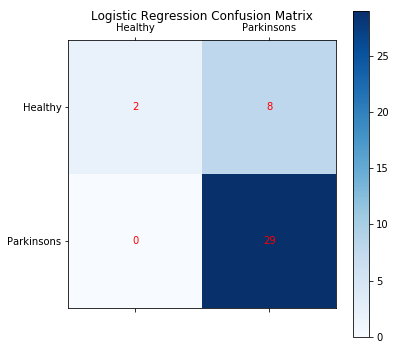

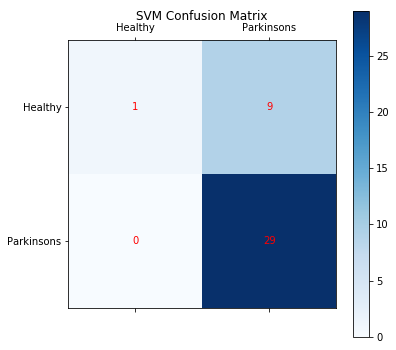

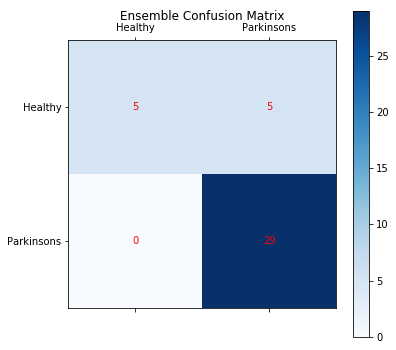

In [106]:
plot_confusion_matrix(confusion_matrix(y_test, lr_test_predict), "Logistic Regression Confusion Matrix")
plot_confusion_matrix(confusion_matrix(y_test, svm_test_predict), "SVM Confusion Matrix")
plot_confusion_matrix(confusion_matrix(y_test, ensemble_test_predict), "Ensemble Confusion Matrix")

From the confusion matrices of the different classifiers we observe that all classifiers achieve similar results, but the voting classifier has by far the best results. This tells us that whilst the Logistic and Support Vector Classifiers are mis-classifying some results, the Voting Classifier is achieving higher prediction accuracy due to considering the underlying prediction probabilities for each of the estimators.

## Comparison of Ensemble to Base Classifiers
It would be expected that the Voting Classifier would improve on the f1_score of the base classifiers by weighing up the predcition probabilities. Use of a 'soft' voting classifier allows for more accurate predictions by using these underlying probabilities. This is seen by the VotingClassifier achieving a f1 score of `92.064%` compared with the `87.87%` and `89.23%` achieved by the Logistic and Support Vector Classifiers respectively. This is further seen in the confusion matrices in which the Voting Classifier has more accurate predictions.

Overall, we observe the increase accuracy Ensemble Classifiers provide over their base classifiers.

# Project 2 - Abalone Ring Regression
### Summary:
- Download Abalone dataset
- Remove columns
- Divide 90/10
- Train Random Forest
- Perform PCA
- RMSE of Re-Trained Random Forest
- Comparison

### Load and Clean the Data

##### Download the data then load from `./abalone.data`

In [107]:
abalone_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

# Download and save the file locally for future use.
with urllib.request.urlopen(abalone_url) as response:
    data = response.read().decode('utf8')
    out = open('./abalone.data', 'w')
    out.write(data)
    out.close()

data_headers = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
    
# Read in the data with the following headings as they are not included in the .data file
abalone_data = pd.read_csv('./abalone.data', names=data_headers)

## Data Cleaning and Visualisation
Need to convert the text field for sex into a numerical field so use a Label Encoder to achieve this which will assign an integer to each sex class. This will be further reduced when a scaler is included as this will scale these values integer values between 0 and 1. Experimented with and without the Sex feature and found that keeping the feature improved RMSE accuracy of the predictions between 0.02 and 0.11.

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
abalone_data.Sex = le.fit_transform(abalone_data.Sex)

# Check that the label encoding has occured
abalone_data.describe()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


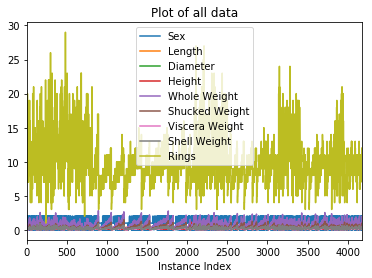

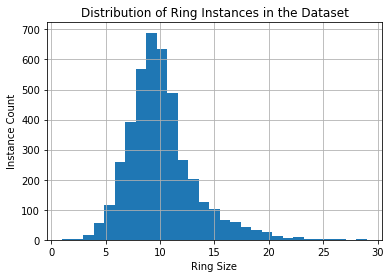

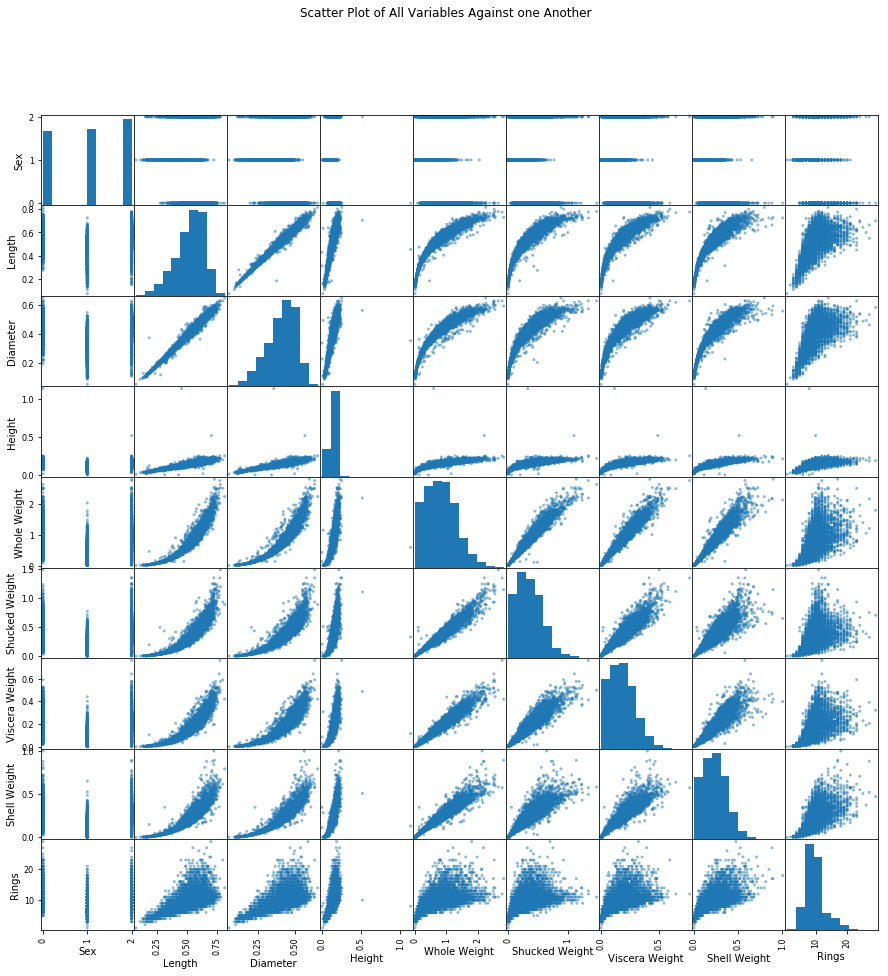

In [109]:
abalone_data.plot()
plt.title("Plot of all data")
plt.xlabel("Instance Index")
plt.show()

abalone_data.Rings.hist(bins=29)
plt.title("Distribution of Ring Instances in the Dataset")
plt.xlabel("Ring Size")
plt.ylabel("Instance Count")
plt.show()

# Plot all variables against each other to observe any clear relationships.
scatter_matrix(abalone_data, figsize=(15,15))
plt.suptitle("Scatter Plot of All Variables Against one Another")
plt.show()

The scatter matrix shows there are a number of linear and possibly logarithmic/exponential relationships betwween variables in the data.

We see from the distribution that there are very few of the lower rings in the distribution (1,2,3,4) and from (23 to 29). We should group rings with values from 1-4 as `4`, and will remove values between 23 and 29 from the dataset to improve RMSE of prediction.

In [110]:
def group_abalone_rings(data):
    new_ring_groups = []
    for i, row in data.iterrows():
        if row["Rings"] < 4:
            row["Rings"] = 4
        new_ring_groups.append(row["Rings"])
    return new_ring_groups

# Group the Abalone rings
abalone_data.Rings = group_abalone_rings(abalone_data)

"""
 Remove instances where rings >= 23, we could merge them but there appears to be high variability in features for 
 instances with high ring count (see above scatter plot) and without additional instances for these rings we will likely
 overfit the data reducing the overall accuracy for the much more common ring counts.
"""
abalone_data = abalone_data.drop(abalone_data[abalone_data["Rings"] > 22].index)

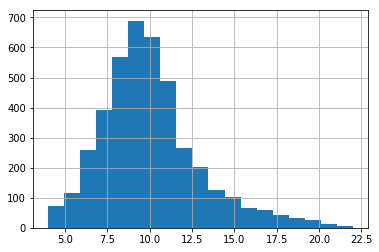

In [111]:
abalone_data.Rings.hist(bins=19)
plt.show()

We can see that the distribution of the rings is much better now, although it is still skewed.

### Create Training and Test Datasets
Split the data in a 90/10 split for training and testing using a ShuffleSplit as it allows us to split on a given test size quite easily.

In [112]:
from sklearn.model_selection import ShuffleSplit

# Shuffle the data first then split the dataset with a 90/10 split (training/test).
ss = ShuffleSplit(train_size=0.9, test_size=0.1, random_state=random_seed)

# Target feature
target = "Rings"

for train_index, test_index in ss.split(abalone_data.iloc[:, :len(abalone_data.columns)-2], abalone_data[target]):
    X_train2, X_test2 = abalone_data.iloc[train_index], abalone_data.iloc[test_index]
    y_train2, y_test2 = abalone_data.iloc[train_index][target], abalone_data.iloc[test_index][target]

# Drop the feature we are trying to predict after the data has been distributed.
X_train2 = X_train2.drop("Rings", axis=1)
X_test2 = X_test2.drop("Rings", axis=1)

Normally we would scale here, but RandomForest is **not** sensitive to feature scaling, so it is not needed.

## Fit Random Forest Regressor
We will see which features are most important, remove them and re-train the RFR later on.

In [113]:
from sklearn.ensemble import RandomForestRegressor

# RFR on a scaled feature set
rfr = RandomForestRegressor(criterion="mae", n_estimators=100, min_samples_leaf=8, random_state=random_seed).fit(X_train2, y_train2)

# Predict on the training set (This will be used later when I compare the RMSE this regressor and ones with reduced dimensionality)
rfr_train_predict = rfr.predict(X_train2)
# Predict on the testing set (This will be used later when I compare the RMSE this regressor and ones with reduced dimensionality)
rfr_test_predict = rfr.predict(X_test2)

For the RandomForest Regressor hyperparameters were determined by trial and error, with `criterion='mae'` providing a noticable improvement over `mse`. Increasing the number of estimators to `n_estimators=100` improved the regressor accuracy compared to just using `10` estimators. `min_samples_leaf=8` performed better than other numbers in this area on the test set as it regularised the regressor, stopping it from over-fitting the training data.


## Dimensional Reduction - Feature Importance
Lets view the feature importance of the RandomForestRegressor and determine which features are least importance and remove them to hopefully reduce dimensionality and increase prediction accuracy.

In [114]:
# Get the feature names from the data
feature_names = list(X_train2)

# Obtain the list of important features by creating a list of tuples with the feature name and its determined importance from
# the RFR model we've fitted.
feature_name_importance = [(feature_names[i], rfr.feature_importances_[i]) for i in range(len(feature_names))]

# Sort the list of tuples in descending order using a lambda which looks at the importance of the feature.
feature_name_importance.sort(key= lambda x: x[1], reverse=True)

# Iterate through all the features and print out all features and their importance, keeping track of when features
# contribute less than 95% of the importance in the model as these will be removed.
unimportant_features = []
feature_value = 0

print("Feature Importance:")
for f in feature_name_importance:
    if feature_value < 0.95:
        feature_value += f[1]
    else:
        unimportant_features.append(f[0])
    print("%s:\t%.6f" % (f[0], f[1]))

# Output the unimportant features that will be removed
print("\nList of Unimportant Features Based on 95% threshold:")
for feat in unimportant_features:
    print(feat)

Feature Importance:
Shell Weight:	0.643361
Shucked Weight:	0.127313
Diameter:	0.052896
Whole Weight:	0.050105
Height:	0.037264
Viscera Weight:	0.036601
Sex:	0.024047
Length:	0.018413

List of Unimportant Features Based on 95% threshold:
Length


Based on these results we should remove the Sex and Length threshold. Important to note that this code allows for slightly over 95% of the feature importance to be included however when it was limited to only include features if they contributed to strictly less than 95% the resulting accuracy was worse than with no dimensionality reduction.

In [115]:
# For training and test data sets make a copy and drop the unimportant columns from the sets.
X_train2_import = X_train2.copy()
X_train2_import = X_train2_import.drop(unimportant_features, axis=1)

X_test2_import = X_test2.copy()
X_test2_import = X_test2_import.drop(unimportant_features, axis=1)

# Display the data to show that the columns that were meant to be removed were removed.
X_train2_import.describe()

,Sex,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
count,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000
mean,1.059295,0.407595,0.139322,0.826705,0.358687,0.180117,0.238167
std,0.821309,0.099147,0.041704,0.488632,0.221727,0.108930,0.138446
min,0.000000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.000000,0.350000,0.115000,0.441000,0.185375,0.093375,0.130000
50%,1.000000,0.425000,0.140000,0.797500,0.336000,0.170000,0.231250
75%,2.000000,0.480000,0.165000,1.154000,0.502250,0.252500,0.328625
max,2.000000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


Re-train the RandomForestRegressor with the same hyper-parameters but with the improvement of using data with only features contibuting 95% of the importance.

In [116]:
rfr_import = RandomForestRegressor(criterion="mae", n_estimators=100, min_samples_leaf=8, random_state=random_seed).fit(X_train2_import, y_train2)

# Predict on the training set
rfr_import_train_predict = rfr_import.predict(X_train2_import)

# Predict on the testing set
rfr_import_test_predict = rfr_import.predict(X_test2_import)

Lets compare the absolute RMSE of both Regressors, and check that they aren't overfitting by looking at their accuracy on the training set as well.

In [117]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# RandomForestRegressor RMSE on test and training dataset predictions
rfr_mse_train = sqrt(mean_squared_error(y_train2, rfr_train_predict))
rfr_mse_test = sqrt(mean_squared_error(y_test2, rfr_test_predict))

# Format output of errors
print("RMSE of Random Forest Regressor:\nTraining Set: %.6f\tTest Set: %.6f\n" % (rfr_mse_train, rfr_mse_test))

# RFR with Feature Importance RMSE 
rfr_import_mse_train = sqrt(mean_squared_error(y_train2, rfr_import_train_predict))
rfr_import_mse_test = sqrt(mean_squared_error(y_test2, rfr_import_test_predict))

# Format output of errors
print("RMSE of Feature Importance Reduced Random Forest Regressor:\nTraining Set: %.6f\tTest Set: %.6f\n" % (rfr_import_mse_train, rfr_import_mse_test))

RMSE of Random Forest Regressor:
Training Set: 2.037750	Test Set: 1.867985

RMSE of Feature Importance Reduced Random Forest Regressor:
Training Set: 2.021819	Test Set: 1.853320



As expected we see that when the dimensionality of the features is reduced to only include the most important features (features which occur higher in the random forest trees) the accuracy of the regressor increases, although the increase is not substantial only changing from `2.312` to `2.300` on the test set.

### Absolute Estimation Errors for Feature Reduced and Non-Feature Reduced Regressors

Lets compare the absolute errors of each of the estimators using a bar graph for each of the test instances.

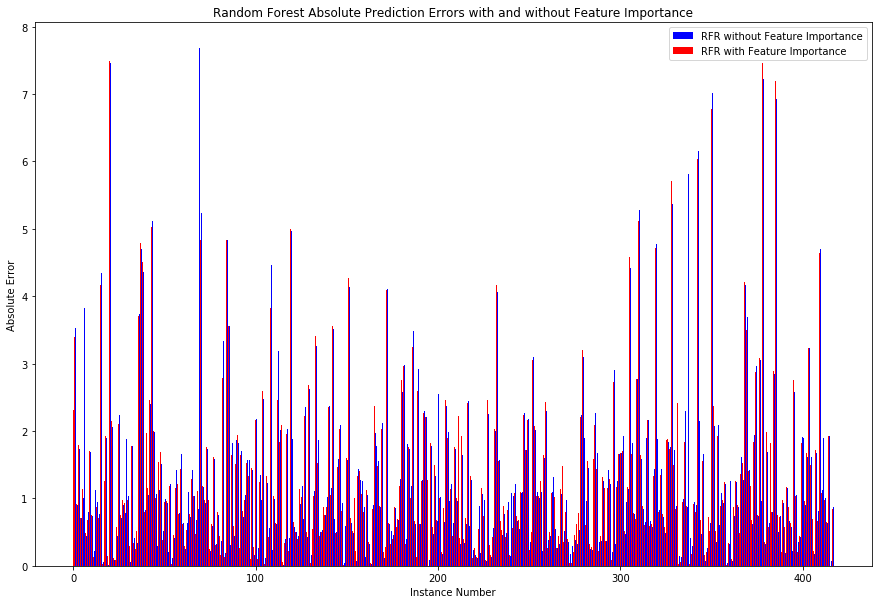

In [118]:
importance_errors = []
default_errors = []

# Store the absolute errors from the test on each model.
for indx, inst in enumerate(y_test2):
    importance_errors.append(abs(inst - rfr_import_test_predict[indx]))
    default_errors.append(abs(inst - rfr_test_predict[indx]))

import numpy as np 

x = np.arange(0, len(default_errors), 1).tolist()
x1 = np.arange(0.5, len(default_errors), 1).tolist()


plt.figure(figsize=(15,10))
plt.title("Random Forest Absolute Prediction Errors with and without Feature Importance")
plt.xlabel("Instance Number")
plt.ylabel("Absolute Error")
plt.bar(x1, default_errors, color='b', width=0.5, label="RFR without Feature Importance")
plt.bar(x, importance_errors, color='r', width=0.5, label="RFR with Feature Importance")
plt.legend()
plt.show()

We see that although both the estimators with and without feature importance achieve similar results, the estimator without unimportant features removed (blue) appears to have larger estimation errors on some instances compared with the regressor with unimportant features removed.

## Dimensional Reduction - PCA

Lets apply PCA to retain 99.7% of the variance and remove the unneeded features based on this method and then retrain and compare the results of all 3 models. Threshold of 99.7% was chosen as 95% excluded too many features resulting in inaccurate predictions.

In [119]:
from sklearn.decomposition import PCA

# Apply PCA and only keep 0.997 of the explained variance and 0.95 only keeps 1 feature which is not accurate enough.
# When fit and transform are applied features which account for 99.7% of the variance will be kept, the others will be removed.
pca = PCA(n_components=0.997, copy=True, random_state=random_seed)

# Fit and transform (remove low variance features) using the training data
X_train2_pca_red = pca.fit_transform(X_train2)

# Apply the transformation (removal of low variance features) to the test data as well.
X_test2_pca_red = pca.transform(X_test2)

# Output the explained variance
print(pca.explained_variance_ratio_)

[0.66183508 0.32946004 0.00380157 0.00281117]


Re-train a RandomForestRegressor using the **same** hyper-parameters as before but with the benefit of only using the remaing features contributing to the variance, as determined by PCA. This removes half of the features lowering it to only 4 used in predictions.

In [120]:
rfr_pca_red = RandomForestRegressor(criterion="mae", n_estimators=100, min_samples_leaf=8, random_state=random_seed).fit(X_train2_pca_red, y_train2)

# Predict on the training dataset to check we aren't overfitting
y_pca_train2_predict = rfr_pca_red.predict(X_train2_pca_red)

# Predict on the test dataset to determine model accuracy compared with other models.
y_pca_test2_predict = rfr_pca_red.predict(X_test2_pca_red)

## Compare Dimensional Reduction Techniques
Compare the RMSE of the non-feature reduced regressor, the feature importance reduced regressor and the pca feature reduced regressor, to see which improves the prediction accuracy on the test set the most.

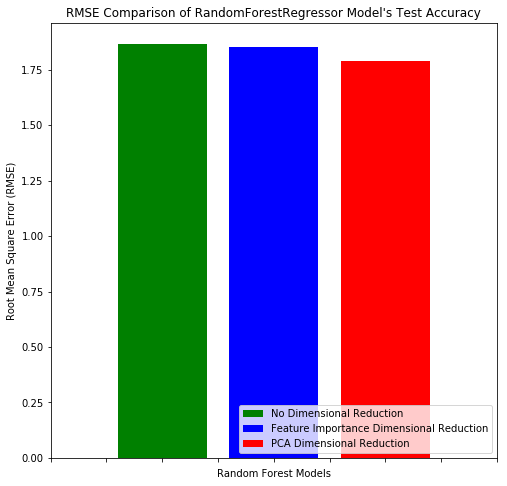

RMSE of Baseline Random Forest Regressor:
Training Set: 2.037750	Test Set: 1.867985

RMSE of Feature Importance Reduced Random Forest Regressor:
Training Set: 2.021819	Test Set: 1.853320

RMSE of PCA Reduced Random Forest Regressor:
Training: 1.937278	Test: 1.791642



In [121]:
# RandomForestRegressor with PCA variance reduction determine the MSE
rfr_red_mse_train = sqrt(mean_squared_error(y_train2, y_pca_train2_predict))
rfr_red_mse_test = sqrt(mean_squared_error(y_test2, y_pca_test2_predict))

# Plot bar graph of RMSE between different reduction techniques
plt.figure(figsize=(8,8))
plt.title("RMSE Comparison of RandomForestRegressor Model's Test Accuracy")
plt.bar([0], [rfr_mse_test], label='No Dimensional Reduction', color='g')
plt.bar([1], [rfr_import_mse_test], label='Feature Importance Dimensional Reduction', color='b')
plt.bar([2], [rfr_red_mse_test], label="PCA Dimensional Reduction", color='r')
plt.ylabel("Root Mean Square Error (RMSE)")
plt.xlabel("Random Forest Models")

# Remove x-axis labels as they don't mean anything
locs, labels = plt.xticks()
labels = ["" for i in range(len(locs))]
plt.xticks(locs, labels)

# Display the graph plus the legend
plt.legend(loc='lower right')
plt.show()

# Output Raw values
# No Dimensional Reduction
print("RMSE of Baseline Random Forest Regressor:\nTraining Set: %.6f\tTest Set: %.6f\n" % (rfr_mse_train, rfr_mse_test))

# Dimensional Reduction with Feature Importance
print("RMSE of Feature Importance Reduced Random Forest Regressor:\nTraining Set: %.6f\tTest Set: %.6f\n" % (rfr_import_mse_train, rfr_import_mse_test))

# Dimensional Reduction with PCA
print("RMSE of PCA Reduced Random Forest Regressor:\nTraining: %.6f\tTest: %.6f\n" % (rfr_red_mse_train, rfr_red_mse_test))

After the model has been retrained with PCA to reduce dimensionality of features that account for less than 0.3% of the variance in the data, we observe that this Random Forest Regressor improves its Root Mean Squared Error accuracy to `1.792` over the other Regressors (`1.868` and `1.853`) with different approaches to dimensionality reduction.

### Conclusion
We observe that reducing dimensionality with PCA provides the best results compared with using feature importance, or no reduction in dimensionality. Feature importance as a dimensional reduction technique does provide some benefit over no dimensional reduction, but is small compared with that of PCA

These results can be explained by the fact that features which contribute 0.3% of the variance have little effect on the outcome, compared to features that account for the larger variance. Accuracy improves as these features which had little effect on the outcome are removed allowing the RandomForest to better fit the features which have a larger contribution to the output.